<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [30]:
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# resample the dataset
from sklearn.utils import resample
from sklearn.utils import shuffle

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import the XGBoost function for classification
from xgboost import XGBClassifier
# import the XGBoost function for classification
from xgboost import XGBClassifier
import statsmodels.api as sm
import random

In [31]:
plt.rcParams['figure.figsize'] = [15,8]

#### Read the data

Load the csv file and print the first five observations.

In [32]:
# type your code here
df=pd.read_csv("seedtype_data.csv")
df.head()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.760000,13.380000,5.073000,3.155000,4.830000,0.000000
1,12.130000,13.730000,5.394000,3.745000,5.220000,0.000000
2,14.860000,14.670000,nan,3.258000,5.351000,0.000000
3,15.690000,14.750000,5.527000,3.514000,5.046000,0.000000
4,19.940000,16.920000,6.675000,3.763000,6.550000,1.000000


**The data definition is as follows:** <br>

**Area**: Area of the wheat kernel 

**Perimeter**: Perimeter of the wheat kernel

**Kernel_len**: Length of the wheat kernel

**Kernel_width**: Width of the wheat kernel

**Kernelgroove_len**: Length of the wheat kernel groove

**Type**: Type of the wheat seed (0 = Kama Wheat, 1 = Rosa Wheat) (target/dependent variable)

Our objective is to predict whether the wheat seed is of Kama or Rosa type.

### Let's begin with some hands-on practice exercises

In [33]:
df.shape

(202, 6)

In [34]:
df.dtypes

Area                float64
Perimeter           float64
Kernel_len          float64
Kernel_width        float64
Kernelgroove_len    float64
Type                float64
dtype: object

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is there any record where no data have been reported? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# type your code here
df.std()

Area               2.504142
Perimeter          1.210241
Kernel_len         0.445302
Kernel_width       0.305630
Kernelgroove_len   0.479849
Type               0.480258
dtype: float64

In [36]:
# There is no any record where no data have been reported.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Use the visualization technique to identify the variables with missing data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
Total = df.isnull().sum().sort_values(ascending=False)          
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Kernel_len,9,4.455446
Type,3,1.485149
Kernelgroove_len,3,1.485149
Kernel_width,3,1.485149
Perimeter,3,1.485149
Area,3,1.485149


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Use the appropriate technique to replace the missing data in the variable representing the length of a wheat kernel
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# type your code here
df['Kernel_len'] = df['Kernel_len'].fillna(df['Kernel_len'].median())
df['Area'] = df['Area'].fillna(df['Area'].median())
df['Perimeter'] = df['Perimeter'].fillna(df['Perimeter'].median())
df['Kernel_width'] = df['Kernel_width'].fillna(df['Kernel_width'].median())
df['Kernelgroove_len'] = df['Kernelgroove_len'].fillna(df['Kernelgroove_len'].median())
df['Type'] = df['Type'].fillna(df['Type'].median())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the variables containing extreme values and remove such observations, if present
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

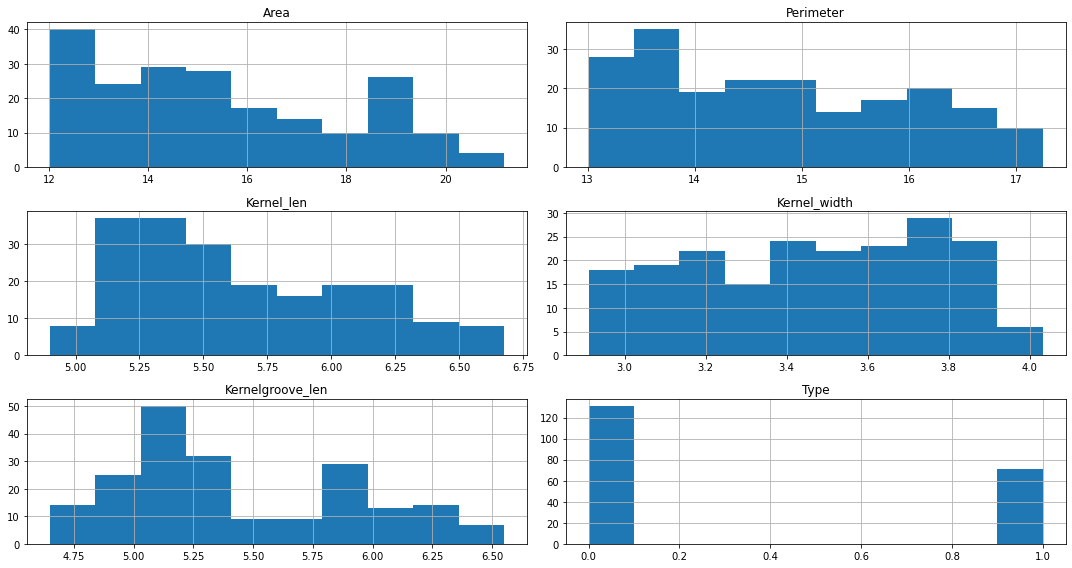

Skewness:


Area                0.453363
Perimeter           0.292416
Kernel_len          0.516168
Kernel_width       -0.178799
Kernelgroove_len    0.551106
Type                0.626802
dtype: float64

In [39]:

df.hist()
plt.tight_layout()
plt.show()  
print('Skewness:')
df.skew()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Apply the gradient boosting on 80% of the data with 250 estimators each of maximum depth 2. Also, calculate the precision and sensitivity using the confusion matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
x=df.drop(["Type"],axis=1)
y=df["Type"]
X=sm.add_constant(x)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [42]:
# type your code here
gboost_model = GradientBoostingClassifier(n_estimators = 250, max_depth = 2, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=250, random_state=10)

In [43]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

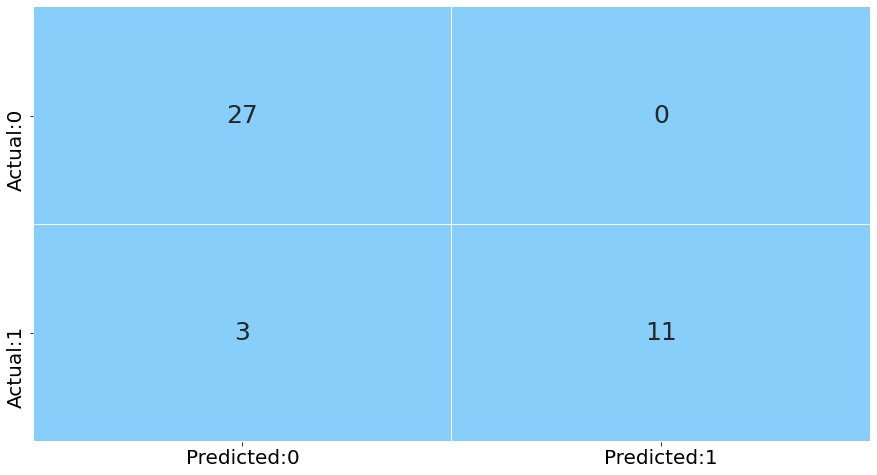

In [44]:
plot_confusion_matrix(gboost_model)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Create 80 stumps using AdaBoost and plot the ROC curve along with the AUC score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

In [46]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [47]:
ada_model = AdaBoostClassifier(n_estimators = 80, random_state = 10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=80, random_state=10)

In [48]:
test_report = get_test_report(ada_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        27
         1.0       0.85      0.79      0.81        14

    accuracy                           0.88        41
   macro avg       0.87      0.86      0.86        41
weighted avg       0.88      0.88      0.88        41



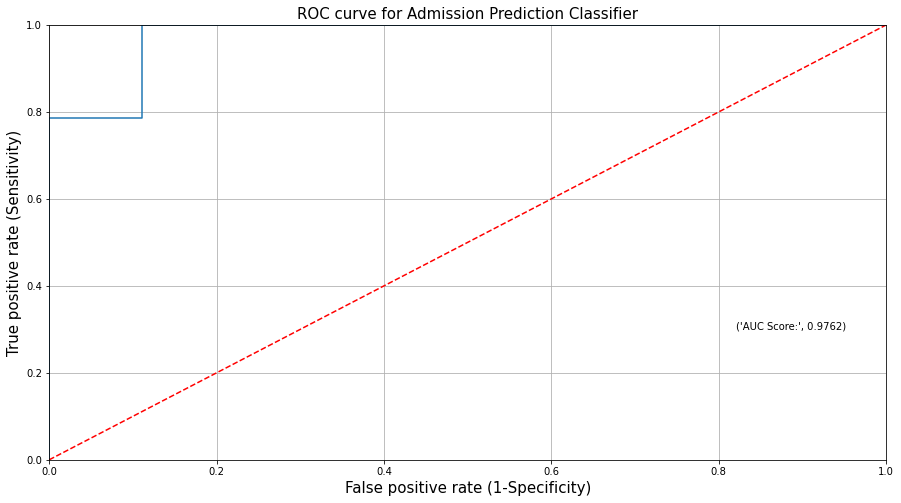

In [49]:
plot_roc(ada_model)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Select the optimal maximum depth from the given values for 180 base learners to build the gradient boosting classifier (consider 3-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

depth = [2, 3, 4, 5, 6, 7, 8]

In [50]:

tuning_parameters = {'learning_rate': [180],
                     'max_depth': [2, 3, 4, 5, 6, 7, 8]}

gb_model = GradientBoostingClassifier()
gb_grid = GridSearchCV(estimator = gb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
gb_grid.fit(X_train, y_train)

print('Best parameters for GBoost classifier: ', gb_grid.best_params_, '\n')

Best parameters for GBoost classifier:  {'learning_rate': 180, 'max_depth': 3} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build the XGBoost model with a learning rate of 0.4 and gamma equal to 3. Calculate the accuracy by plotting the confusion matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:

tuning_parameters = {'learning_rate': [0.4],
                     'gamma': [3]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'accuracy')
xgb_grid.fit(X_train, y_train)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[22:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [52]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))
xgb_model = xgb_grid_model.fit(X_train, y_train)
print('Classification Report for test set:\n', get_test_report(xgb_model))

[22:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report for test set:
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        27
         1.0       1.00      0.79      0.88        14

    accuracy                           0.93        41
   macro avg       0.95      0.89      0.91        41
weighted avg       0.93      0.93      0.92        41



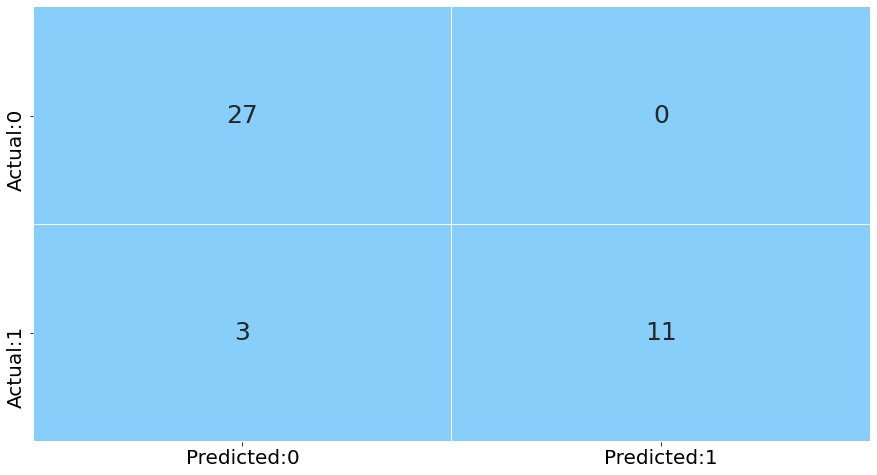

In [53]:
plot_confusion_matrix(xgb_model)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the stacking technique on 70% of the data with the 9-NN and Naive Bayes model as base learners. Consider the Adaboost model as a final estimator. Also, compute the AUC score of the model </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
# type your code here
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17)),
                               ('NB_model', GaussianNB())],
                   final_estimator=GaussianNB())

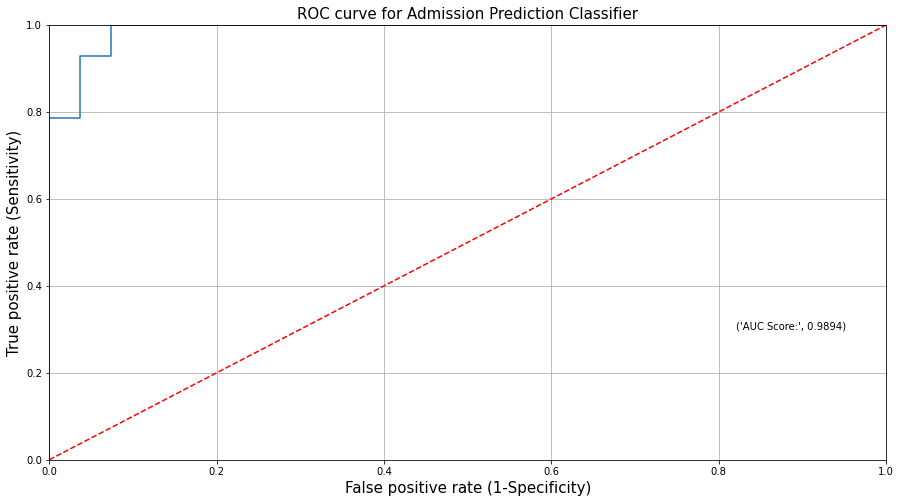

In [55]:
plot_roc(stack_model)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Use the base learners in Q9 and build a stacking model with the XGBoost as final estimator. Compute the AUC score of the model and compare it with the result of Q9 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# type your code here
# type your code here
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = xgb_model)

# fit the model on train dataset
stack_model.fit(X_train, y_train)

[21:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17)),
                               ('NB_model', GaussianNB())],
                   final_estimator=XGBClassifier(base_score=0.5,
                                                 booster='gbtree',
                                                 co...
     

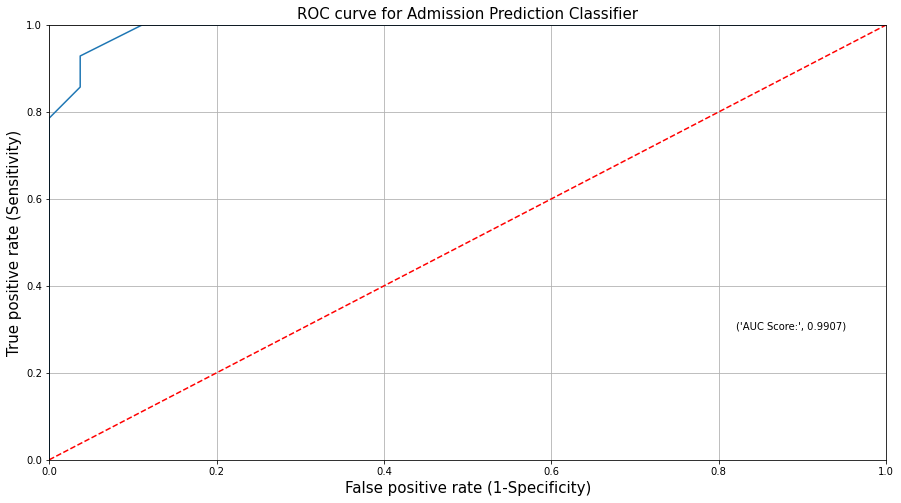

In [29]:
plot_roc(stack_model)